In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
import shap
import numpy as np

In [3]:
cust_cnn = load_model('/home/axernox/Resnet50/customcnn_canny.keras')

I0000 00:00:1731081079.591764    7448 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1440 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 Ti Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


## SHAP

In [4]:
img = image.load_img('/home/axernox/Resnet50/tbx11k-simplified_can/testcan/tb/tb0824.png', target_size=(256, 256))
img_array = image.img_to_array(img)
#img_array = np.expand_dims(img_array, axis=0)
#img_array = preprocess_input(img_array)
print(img_array.shape)

(256, 256, 3)


In [5]:
class_names = ['healthy', 'sick_no_tb', 'tb']

In [6]:
X1 = np.array([img_array])
X1.shape

(1, 256, 256, 3)

In [8]:
print(cust_cnn.predict(X1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
[[7.8285152e-24 3.4016656e-13 1.0000000e+00]]


In [9]:
masker = shap.maskers.Image("inpaint_telea", img_array.shape)
def f1(X):
    tmp = X.copy()
    return cust_cnn(tmp)
explainer = shap.Explainer(f1, masker, output_names=class_names)

In [10]:
shap_values = explainer(X1[0:1], max_evals=500, batch_size=8, outputs=shap.Explanation.argsort.flip[:1])

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [00:23, 23.45s/it]               


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


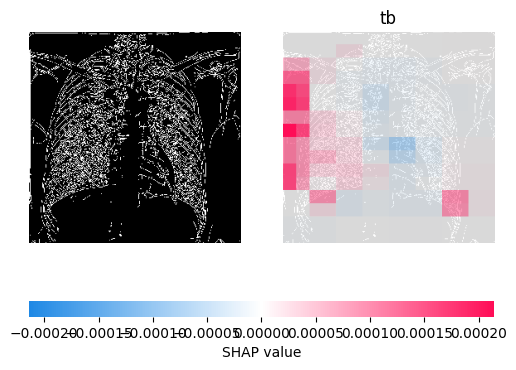

In [11]:
shap.image_plot(shap_values)
